In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score


In [ ]:
df = pd.read_excel("./random_forest_dataset.xlsx",header=1)
df.head()

In [3]:
df.isnull().sum()

Sl No     0
USN       0
Name      0
Title     1
P1        0
C1        0
P2        0
C2        0
P3        0
C3        0
R1        8
T1        8
P3T       0
Total     0
Grade     8
dtype: int64

In [4]:
# handle outliers 
df.dropna(inplace=True)
# there is this extra space after the column names 
x = df.drop(['Sl No ',"USN ","Name ","Title ","Grade"],axis=1)
y = df.Grade

In [5]:
x.head()


,P1,C1,P2,C2,P3,C3,R1,T1,P3T,Total
0,78,15.6,85.0,34.0,93,18.6,13.0,4.0,35.6,85.2
1,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0
2,84,16.8,82.0,32.8,88,17.6,13.0,1.0,31.6,81.2
3,88,17.6,85.0,34.0,96,19.2,13.0,4.0,36.2,87.8
4,84,16.8,82.0,32.8,77,15.4,15.0,5.0,35.4,85.0


In [6]:
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['Grade'])

In [7]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)


Total     0.265683
P2        0.169375
C2        0.153380
P3T       0.094639
C1        0.087354
P1        0.080260
P3        0.050340
C3        0.046696
R1        0.036470
T1        0.015802
dtype: float64


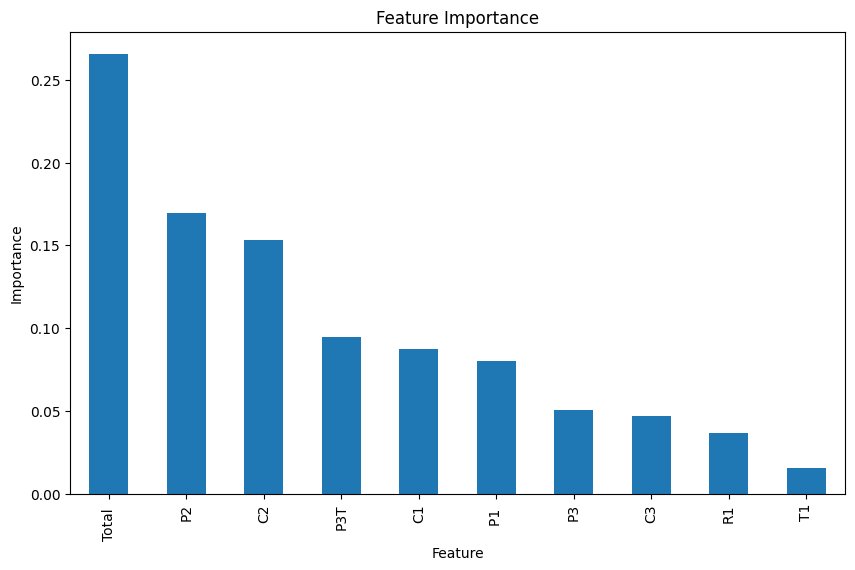

In [8]:
rf = RandomForestClassifier(random_state=42)
rf.fit(x_train,y_train)

feature_importances = pd.Series(rf.feature_importances_, index=x.columns).sort_values(ascending=False)
print(feature_importances)
plt.figure(figsize=(10, 6))
feature_importances.plot(kind='bar')
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importance')
plt.show()

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid correctly
param_grid = {
    'n_estimators': [100, 200, 300],  # Fixed key name
    'max_depth': [10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]  # Fixed "min_samples_lear" typo
}

grid_search = GridSearchCV(estimator=rf, param_grid = param_grid, cv=5, n_jobs=-1,verbose=1)

grid_search.fit(x_train,y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


/home/aditya/.local/lib/python3.10/site-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 3 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [10]:
best_params = grid_search.best_params_
best_params

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 2,
 'n_estimators': 100}

In [11]:
best_rf = RandomForestClassifier(random_state=42,**best_params)
best_rf.fit(x_train,y_train)
y_pred = best_rf.predict(x_test)

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, 
    classification_report
)


In [13]:
# Print metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"🔹 Accuracy: {accuracy:.4f}")
print(f"🔹 Precision: {precision:.4f}")
print(f"🔹 Recall: {recall:.4f}")
print(f"🔹 F1 Score: {f1:.4f}")

# Print classification report
print("\n🔹 Classification Report:\n", classification_report(y_test, y_pred))


🔹 Accuracy: 0.8182
🔹 Precision: 0.8674
🔹 Recall: 0.8182
🔹 F1 Score: 0.8253

🔹 Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.80      0.86        15
           1       0.44      1.00      0.62         4
           2       0.00      0.00      0.00         1
           3       1.00      0.85      0.92        13

    accuracy                           0.82        33
   macro avg       0.59      0.66      0.60        33
weighted avg       0.87      0.82      0.83        33



/home/aditya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aditya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aditya/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/home/aditya/.local/li

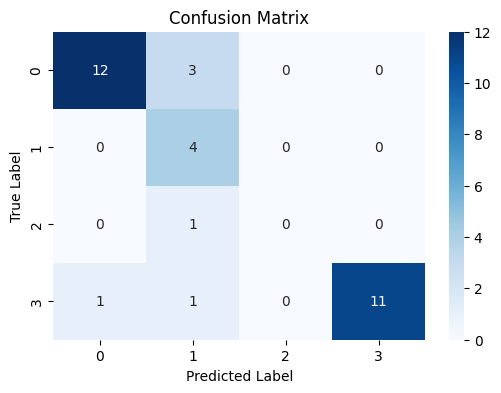

In [14]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()
